# About the Dataset

**EEG signal Data gathered from 10 college students collected when they were watching MOOC Videos. There were 20 total videos out of which 10 were confusing (like Quantum Mechanics) and 10 were non-confusing (simple algebra, geometry)**

The students wore a **single channel wireless headset (MindSet)** to caputre their  eeg signals and reported their confusion on a scale of one to seven.

The **MindSet** measures the voltage between the electrode resting on forehead and two electrodes (one ground and one reference) each in contact with each ear.

Output is labels as confused or not indicated as 0-Confused and 1-Not confused

In [58]:
import numpy as np
import pandas as pd
import seaborn 
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report

In [59]:
%config Completer.use_jedi = False # for autocompletion to work

## Getting the EEG Data

In [60]:
df = pd.read_csv('/kaggle/input/confused-eeg/EEG_data.csv')

In [61]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12811 entries, 0 to 12810
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SubjectID           12811 non-null  float64
 1   VideoID             12811 non-null  float64
 2   Attention           12811 non-null  float64
 3   Mediation           12811 non-null  float64
 4   Raw                 12811 non-null  float64
 5   Delta               12811 non-null  float64
 6   Theta               12811 non-null  float64
 7   Alpha1              12811 non-null  float64
 8   Alpha2              12811 non-null  float64
 9   Beta1               12811 non-null  float64
 10  Beta2               12811 non-null  float64
 11  Gamma1              12811 non-null  float64
 12  Gamma2              12811 non-null  float64
 13  predefinedlabel     12811 non-null  float64
 14  user-definedlabeln  12811 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


## Getting the demographic data

In [63]:
demo_df = pd.read_csv('/kaggle/input/confused-eeg/demographic_info.csv')

In [64]:
demo_df.head()

,subject ID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [65]:
## Renaming columns for easy merging
demo_df = demo_df.rename(columns = {'subject ID': 'SubjectID'})

In [66]:
demo_df.head()

,SubjectID,age,ethnicity,gender
0,0,25,Han Chinese,M
1,1,24,Han Chinese,M
2,2,31,English,M
3,3,28,Han Chinese,F
4,4,24,Bengali,M


In [67]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0


### Merging both the dataframes based on SubjectId

In [68]:
df = df.merge(demo_df,how = 'inner',on = 'SubjectID')

In [69]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,Beta2,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity,gender
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,45097.0,33228.0,8293.0,0.0,0.0,25,Han Chinese,M
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,3687.0,5293.0,2740.0,0.0,0.0,25,Han Chinese,M
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,130536.0,57243.0,25354.0,0.0,0.0,25,Han Chinese,M
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,62462.0,49960.0,33932.0,0.0,0.0,25,Han Chinese,M
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,99603.0,44790.0,29749.0,0.0,0.0,25,Han Chinese,M


### Having one hot encoding for categorical variables like gender and stuff

In [70]:
df = pd.get_dummies(df)

In [71]:
df.head()

,SubjectID,VideoID,Attention,Mediation,Raw,Delta,Theta,Alpha1,Alpha2,Beta1,...,Gamma1,Gamma2,predefinedlabel,user-definedlabeln,age,ethnicity_Bengali,ethnicity_English,ethnicity_Han Chinese,gender_F,gender_M
0,0.0,0.0,56.0,43.0,278.0,301963.0,90612.0,33735.0,23991.0,27946.0,...,33228.0,8293.0,0.0,0.0,25,0,0,1,0,1
1,0.0,0.0,40.0,35.0,-50.0,73787.0,28083.0,1439.0,2240.0,2746.0,...,5293.0,2740.0,0.0,0.0,25,0,0,1,0,1
2,0.0,0.0,47.0,48.0,101.0,758353.0,383745.0,201999.0,62107.0,36293.0,...,57243.0,25354.0,0.0,0.0,25,0,0,1,0,1
3,0.0,0.0,47.0,57.0,-5.0,2012240.0,129350.0,61236.0,17084.0,11488.0,...,49960.0,33932.0,0.0,0.0,25,0,0,1,0,1
4,0.0,0.0,44.0,53.0,-8.0,1005145.0,354328.0,37102.0,88881.0,45307.0,...,44790.0,29749.0,0.0,0.0,25,0,0,1,0,1


In [72]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln', ' age', ' ethnicity_Bengali',
       ' ethnicity_English', ' ethnicity_Han Chinese', ' gender_F',
       ' gender_M'],
      dtype='object')

In [73]:
## Missing value check
print("Missing values count : " + str(df.isna().sum().sum()))

Missing values count : 0


In [74]:
df[' gender_F'].value_counts()

0    10236
1     2575
Name:  gender_F, dtype: int64

In [75]:
df['user-definedlabeln'].value_counts()

1.0    6567
0.0    6244
Name: user-definedlabeln, dtype: int64

## Let's clean the data

The SubjectID and VideoID will provide hinderance while model training as there are 10 clips for 10 students and these 1-2 min clips are divided ino parts of 0.5 sec samples. So Model will most probably learn based on IDs but we want it to learn on based of ethinicity and gender and age parameters

In [76]:
df.drop(['SubjectID','VideoID','predefinedlabel', ' gender_F'],axis = 1,inplace=True)

In [77]:
df = df[df['Attention']> 0.0]

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


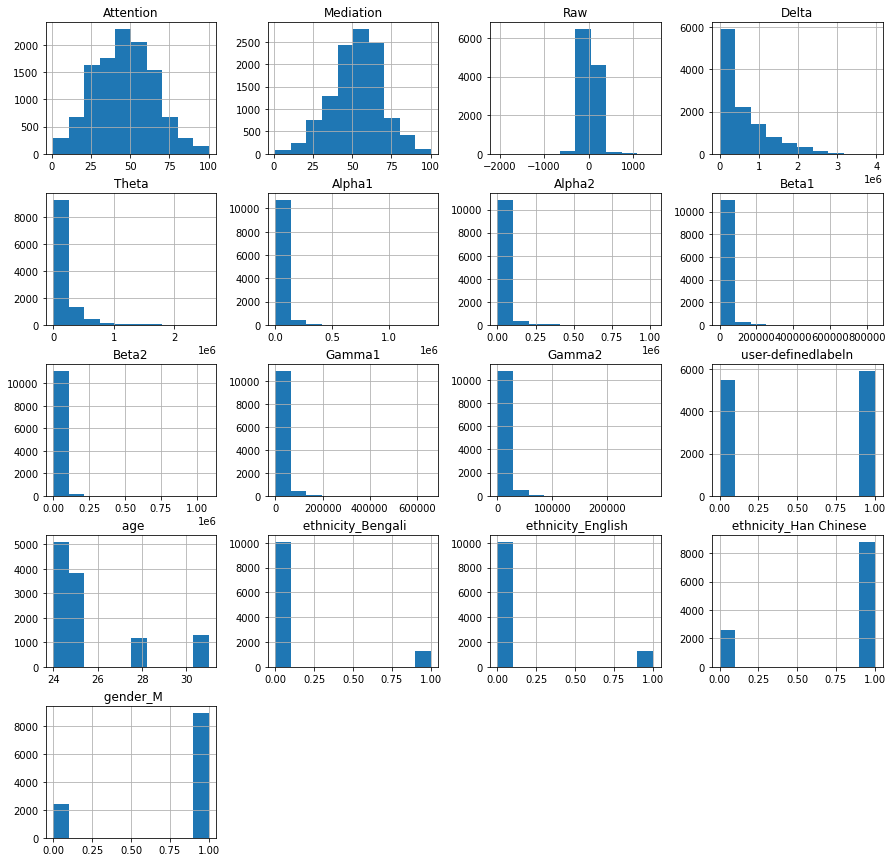

In [78]:
df.hist(figsize = (15,15))
plt.show()

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


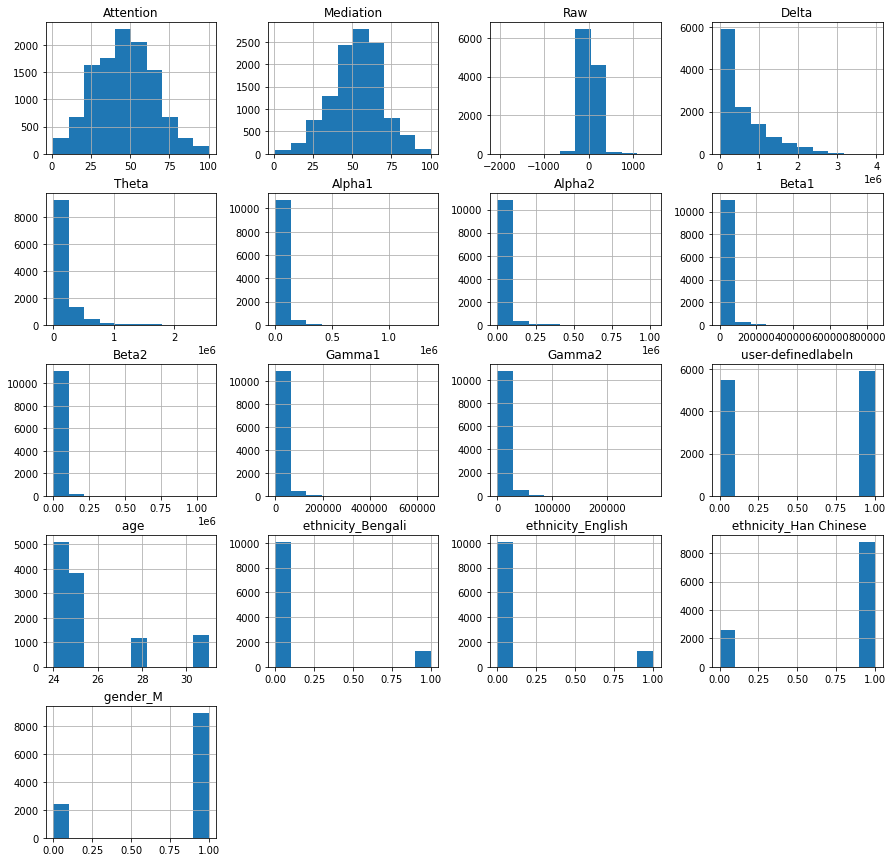

In [79]:
df = df[df['Mediation']> 0.0]
df.hist(figsize = (15,15))
plt.show()

### Let's have a Correlation Matrix

<AxesSubplot:>

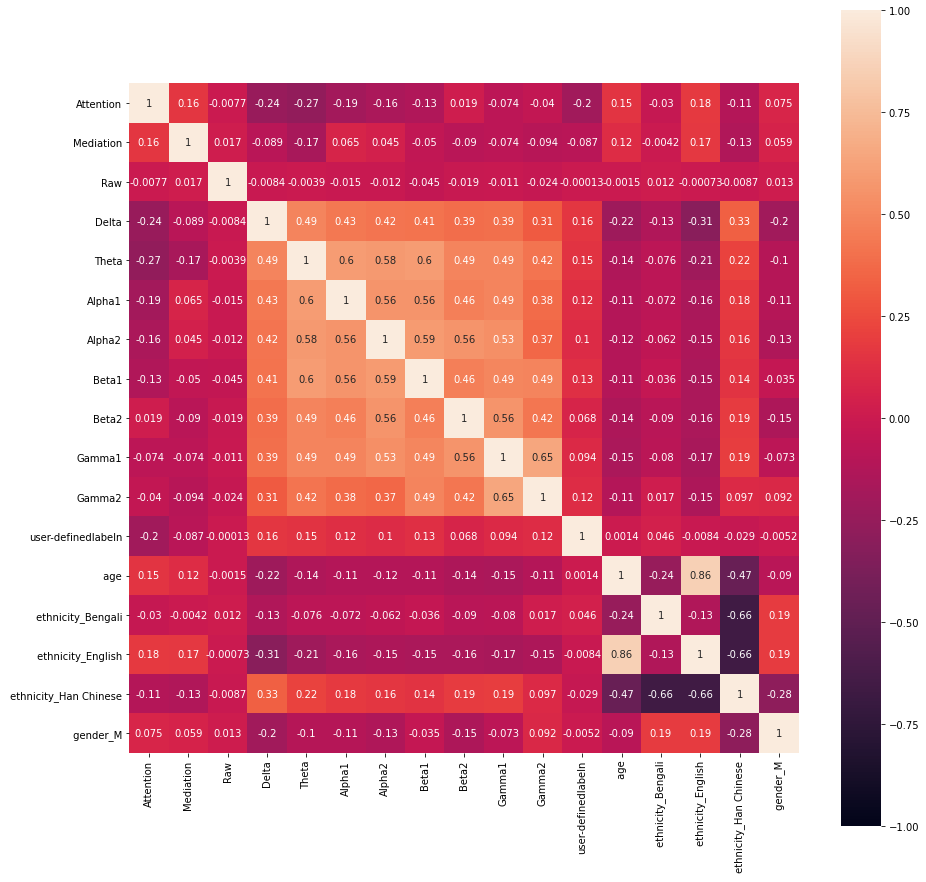

In [80]:
plt.figure(figsize = (15,15))
corr_matrix = df.corr()
seaborn.heatmap(corr_matrix,vmin = -1.0, square=True, annot = True)

As from the heatmap, We see there is a good correlation between **Gamma1 and Beta2**

In [81]:
df['user-definedlabeln'].unique()

array([0., 1.])

In [82]:
df['user-definedlabeln'].value_counts()

1.0    5925
0.0    5463
Name: user-definedlabeln, dtype: int64

### Splitting the dataset based on user-defined labels

In [83]:
X = np.array(df.drop(['user-definedlabeln'],axis = 1))

In [84]:
y = np.array(df['user-definedlabeln'])

In [85]:
X.min(), X.max()

(-2048.0, 3964663.0)

## Data Preprocessing

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
# Transforming data to have mean 0 and std 1

In [88]:
X = StandardScaler().fit_transform(X)

In [89]:
X.min(), X.max()

(-15.829161155386538, 29.216116594451524)

## Data Split

In [90]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

# X_train.shape, y_train.shape

# X_test.shape, y_test.shape

# X_train= np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

# X_train.shape

# X_test= np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

# X_test.shape

# X_train[0]

### Using tf.data.Dataset 

In [91]:
import tensorflow as tf

In [92]:
dataset = tf.data.Dataset.from_tensor_slices((X,y))

In [93]:
dataset_size = X.shape[0]
dataset_size

11388

In [94]:
train_size = int(0.75 * dataset_size)
train_size

8541

In [95]:
X_train = dataset.take(train_size)
X_test = dataset.skip(train_size)

In [96]:
# for i in X_train :
#     print(np.array(i[0]).shape,np.array(i[1]).shape)

In [97]:
X_train = X_train.shuffle(len(X_train))

In [98]:
# Making batches of 32 
X_train = X_train.batch(32)
X_train

<BatchDataset shapes: ((None, 16), (None,)), types: (tf.float64, tf.float64)>

# Model Definition

In [99]:
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Attention, Lambda, Dot, Concatenate,Dropout, Activation

from tensorflow.keras import backend as K

tf.keras.backend.clear_session()

# Custom Attention Layer

In [100]:
from tensorflow.keras.layers import Layer
from tensorflow.keras import backend as K


class Attention(Layer):
    
    def __init__(self, return_sequences=True):
        self.return_sequences = return_sequences
        super(Attention,self).__init__()
        
    def build(self, input_shape):
        
        self.W=self.add_weight(name="att_weight", shape=(input_shape[-1],1),
                               initializer="normal")
        self.b=self.add_weight(name="att_bias", shape=(input_shape[1],1),
                               initializer="zeros")
        
        super(Attention,self).build(input_shape)
        
    def call(self, x):
        
        e = K.tanh(K.dot(x,self.W)+self.b)
        a = K.softmax(e, axis=1)
        output = x*a
        
        if self.return_sequences:
            return output
        
        return K.sum(output, axis=1)

In [101]:

# model = Sequential([
#     LSTM(256,activation = 'relu',input_shape = (X_train.shape[1:]),return_sequences = True),
#     Dropout(0.2),
#     LSTM(256,activation = 'sigmoid',return_sequences=True),
#     Dropout(0.2),
#     LSTM(128,return_sequences=True,activation = 'sigmoid'),
#     Dropout(0.2),
#     LSTM(64),
#     Dropout(0.2),
#     Dense(1,activation = 'sigmoid')
# ])

In [102]:
type(X_train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [103]:
inputs = tf.keras.Input(shape=(16, 1))#lstm takes 3d input of the shape [batch_size, timesteps, feature]
#time steps is the number of the input feature and the features is the number corresponding output value we want to predict
Dense1 = Dense(64, activation = 'relu')(inputs)
Dense2 = Dense(128, activation = 'relu')(Dense1)
lstm_1=  LSTM(256, return_sequences = True)(Dense2)
drop = Dropout(0.2)(lstm_1)
lstm_3=  LSTM(256, return_sequences = True)(drop)
drop2 = Dropout(0.2)(lstm_3)
att_ = Attention(256)(drop2)
Dense_1 = Dense(128, activation = 'relu')(att_)
outputs = Dense(1, activation='sigmoid')(Dense_1)

model = tf.keras.Model(inputs, outputs)

In [104]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 16, 1)]           0         
_________________________________________________________________
dense (Dense)                (None, 16, 64)            128       
_________________________________________________________________
dense_1 (Dense)              (None, 16, 128)           8320      
_________________________________________________________________
lstm (LSTM)                  (None, 16, 256)           394240    
_________________________________________________________________
dropout (Dropout)            (None, 16, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 16, 256)           525312    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 256)           0     

In [105]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics = ['accuracy'])

In [106]:
bs = 32
epochs = 100

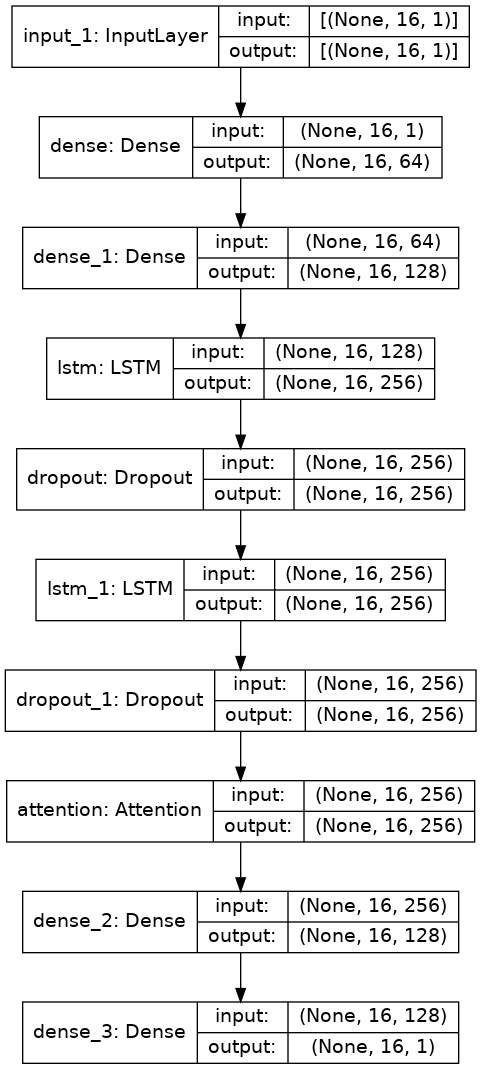

In [107]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='/tmp/model.png', show_shapes=True,)

In [108]:
#spliting it into the train and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25)

In [109]:
#A sample for predicting output while training each epoch
x = np.expand_dims(train_X[0], axis = 0)
x.shape

(1, 16)

In [110]:
x.shape

(1, 16)

# Custom Callback for each epoch outputs

In [111]:
x.reshape(-1,1).shape

(16, 1)

### The callbacks 
We will use reduce_lr callback and early stopping thus made their instances

In [112]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='loss', factor=0.2,
                              patience=5, min_lr=0.001)

early_stop = tf.keras.callbacks.EarlyStopping(
                            monitor = 'accuracy',
                            patience = 5,
                            restore_best_weights=True
                )

Starting epoch 1 , got keys []
Epoch 1/100
267/267 [==============================] - 27s 87ms/step - loss: 0.6865 - accuracy: 0.5383
End of epoch 1 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.5536090731620789
[0]
Predicted : 1
Actual : 1.0


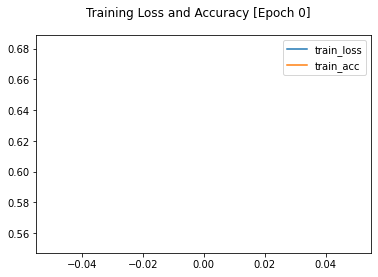

<Figure size 432x288 with 0 Axes>

Epoch 2/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6582 - accuracy: 0.5976
End of epoch 2 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6021616458892822
[0 1]
Predicted : 1
Actual : 1.0


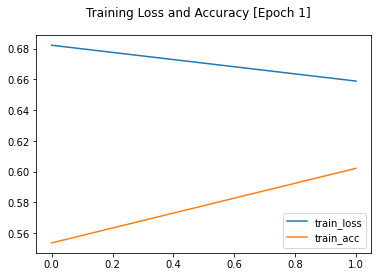

<Figure size 432x288 with 0 Axes>

Epoch 3/100
267/267 [==============================] - 22s 84ms/step - loss: 0.6531 - accuracy: 0.6146
End of epoch 3 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6152748465538025
[0 1 2]
Predicted : 1
Actual : 1.0


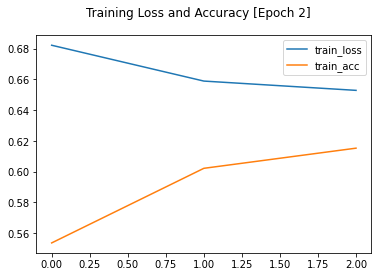

<Figure size 432x288 with 0 Axes>

Epoch 4/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6489 - accuracy: 0.6206
End of epoch 4 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6194605231285095
[0 1 2 3]
Predicted : 1
Actual : 1.0


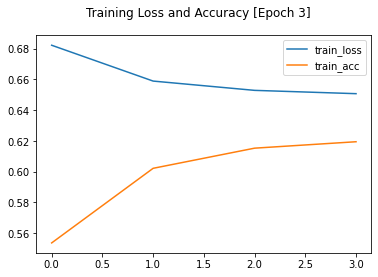

<Figure size 432x288 with 0 Axes>

Epoch 5/100
267/267 [==============================] - 23s 84ms/step - loss: 0.6454 - accuracy: 0.6254
End of epoch 5 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6212533712387085
[0 1 2 3 4]
Predicted : 1
Actual : 1.0


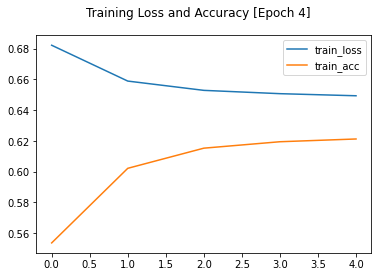

<Figure size 432x288 with 0 Axes>

Epoch 6/100
267/267 [==============================] - 22s 84ms/step - loss: 0.6437 - accuracy: 0.6281
End of epoch 6 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6304077506065369
[0 1 2 3 4 5]
Predicted : 1
Actual : 1.0


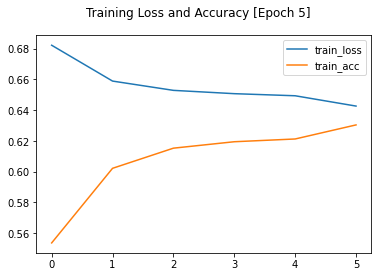

<Figure size 432x288 with 0 Axes>

Epoch 7/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6417 - accuracy: 0.6338
End of epoch 7 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.637161910533905
[0 1 2 3 4 5 6]
Predicted : 1
Actual : 1.0


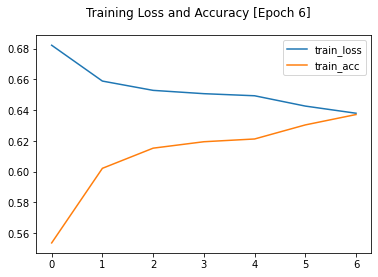

<Figure size 432x288 with 0 Axes>

Epoch 8/100
267/267 [==============================] - 22s 84ms/step - loss: 0.6356 - accuracy: 0.6442
End of epoch 8 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6473115086555481
[0 1 2 3 4 5 6 7]
Predicted : 1
Actual : 1.0


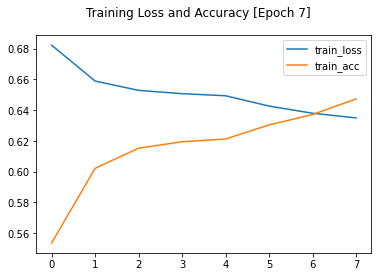

<Figure size 432x288 with 0 Axes>

Epoch 9/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6333 - accuracy: 0.6503
End of epoch 9 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6563122272491455
[0 1 2 3 4 5 6 7 8]
Predicted : 1
Actual : 1.0


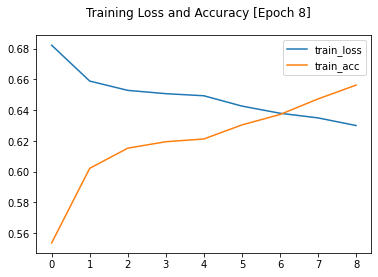

<Figure size 432x288 with 0 Axes>

Epoch 10/100
267/267 [==============================] - 23s 84ms/step - loss: 0.6253 - accuracy: 0.6643
End of epoch 10 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6637981534004211
[0 1 2 3 4 5 6 7 8 9]
Predicted : 1
Actual : 1.0


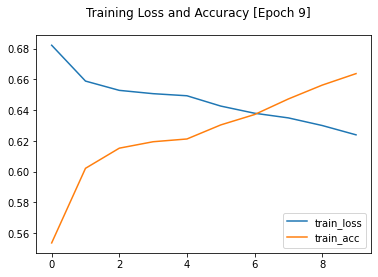

<Figure size 432x288 with 0 Axes>

Epoch 11/100
267/267 [==============================] - 23s 86ms/step - loss: 0.6150 - accuracy: 0.6746
End of epoch 11 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6717451214790344
[ 0  1  2  3  4  5  6  7  8  9 10]
Predicted : 1
Actual : 1.0


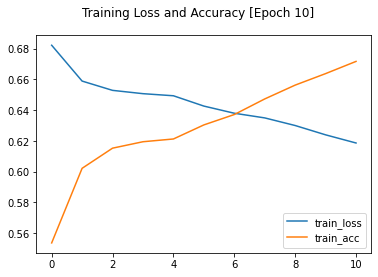

<Figure size 432x288 with 0 Axes>

Epoch 12/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6153 - accuracy: 0.6711
End of epoch 12 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6733476519584656
[ 0  1  2  3  4  5  6  7  8  9 10 11]
Predicted : 1
Actual : 1.0


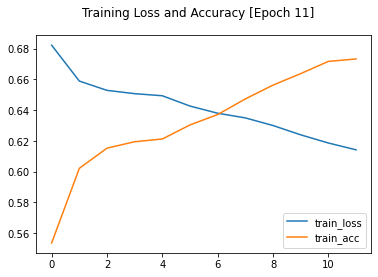

<Figure size 432x288 with 0 Axes>

Epoch 13/100
267/267 [==============================] - 23s 84ms/step - loss: 0.6104 - accuracy: 0.6807
End of epoch 13 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6792091131210327
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Predicted : 1
Actual : 1.0


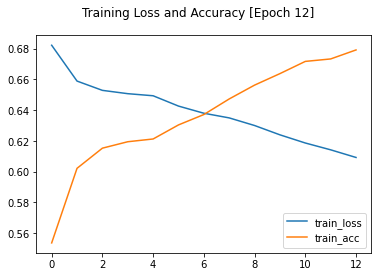

<Figure size 432x288 with 0 Axes>

Epoch 14/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6103 - accuracy: 0.6798
End of epoch 14 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6789163947105408
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Predicted : 1
Actual : 1.0


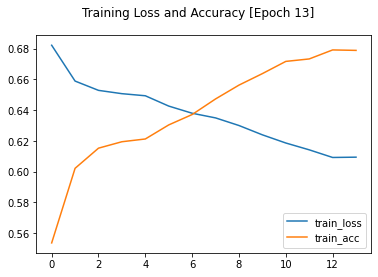

<Figure size 432x288 with 0 Axes>

Epoch 15/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6044 - accuracy: 0.6822
End of epoch 15 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6810750961303711
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
Predicted : 1
Actual : 1.0


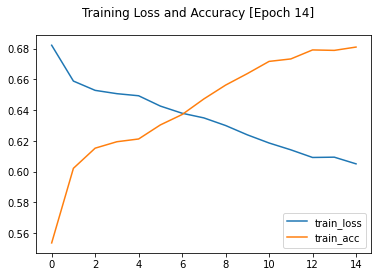

<Figure size 432x288 with 0 Axes>

Epoch 16/100
267/267 [==============================] - 23s 85ms/step - loss: 0.6087 - accuracy: 0.6766
End of epoch 16 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6841265559196472
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
Predicted : 1
Actual : 1.0


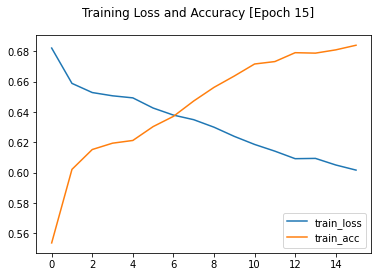

<Figure size 432x288 with 0 Axes>

Epoch 17/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5974 - accuracy: 0.6846
End of epoch 17 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6897684931755066
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]
Predicted : 1
Actual : 1.0


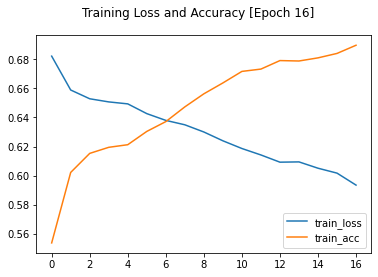

<Figure size 432x288 with 0 Axes>

Epoch 18/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5930 - accuracy: 0.6938
End of epoch 18 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6920076608657837
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17]
Predicted : 1
Actual : 1.0


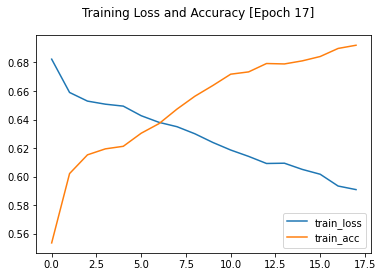

<Figure size 432x288 with 0 Axes>

Epoch 19/100
267/267 [==============================] - 23s 85ms/step - loss: 0.5744 - accuracy: 0.7103
End of epoch 19 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.6993472576141357
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]
Predicted : 1
Actual : 1.0


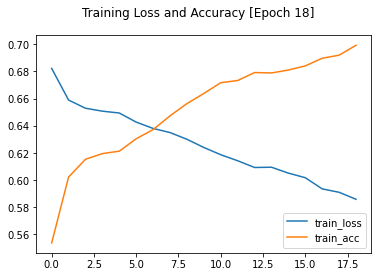

<Figure size 432x288 with 0 Axes>

Epoch 20/100
267/267 [==============================] - 22s 84ms/step - loss: 0.5792 - accuracy: 0.7032
End of epoch 20 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7046818137168884
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Predicted : 1
Actual : 1.0


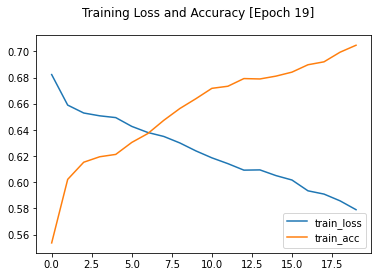

<Figure size 432x288 with 0 Axes>

Epoch 21/100
267/267 [==============================] - 23s 87ms/step - loss: 0.5717 - accuracy: 0.7153
End of epoch 21 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7083260416984558
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
Predicted : 1
Actual : 1.0


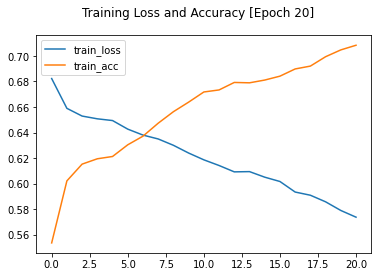

<Figure size 432x288 with 0 Axes>

Epoch 22/100
267/267 [==============================] - 24s 91ms/step - loss: 0.5589 - accuracy: 0.7211
End of epoch 22 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7125263214111328
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
Predicted : 1
Actual : 1.0


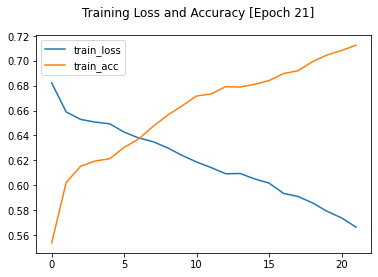

<Figure size 432x288 with 0 Axes>

Epoch 23/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5649 - accuracy: 0.7106
End of epoch 23 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.714926540851593
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]
Predicted : 1
Actual : 1.0


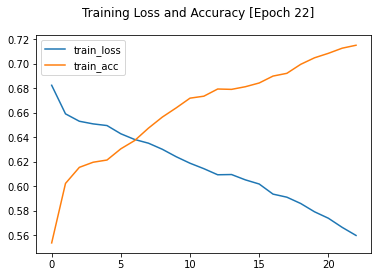

<Figure size 432x288 with 0 Axes>

Epoch 24/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5554 - accuracy: 0.7205
End of epoch 24 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7204294204711914
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Predicted : 1
Actual : 1.0


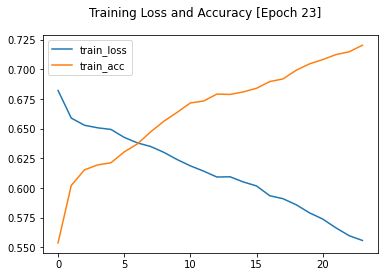

<Figure size 432x288 with 0 Axes>

Epoch 25/100
267/267 [==============================] - 23s 85ms/step - loss: 0.5497 - accuracy: 0.7210
End of epoch 25 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7251200079917908
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
Predicted : 1
Actual : 1.0


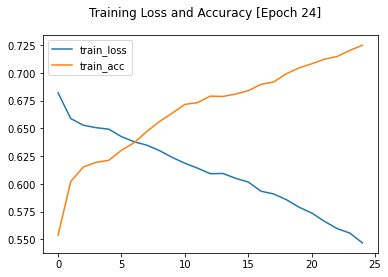

<Figure size 432x288 with 0 Axes>

Epoch 26/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5362 - accuracy: 0.7325
End of epoch 26 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7322474122047424
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25]
Predicted : 1
Actual : 1.0


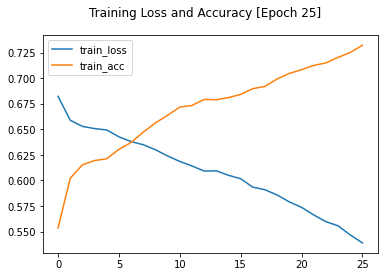

<Figure size 432x288 with 0 Axes>

Epoch 27/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5267 - accuracy: 0.7416
End of epoch 27 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7404358386993408
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26]
Predicted : 1
Actual : 1.0


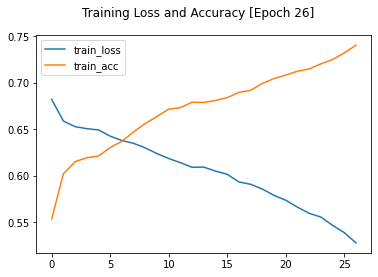

<Figure size 432x288 with 0 Axes>

Epoch 28/100
267/267 [==============================] - 23s 87ms/step - loss: 0.5131 - accuracy: 0.7513
End of epoch 28 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7476803064346313
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Predicted : 1
Actual : 1.0


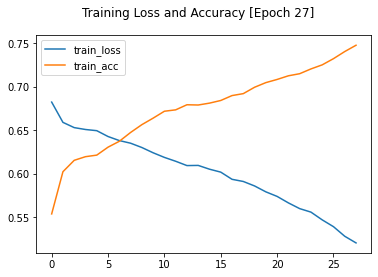

<Figure size 432x288 with 0 Axes>

Epoch 29/100
267/267 [==============================] - 23s 86ms/step - loss: 0.5050 - accuracy: 0.7652
End of epoch 29 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7587665319442749
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28]
Predicted : 1
Actual : 1.0


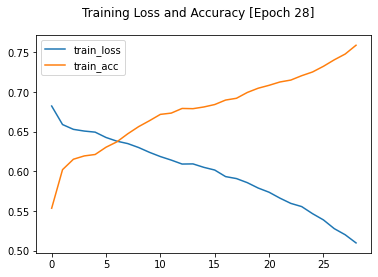

<Figure size 432x288 with 0 Axes>

Epoch 30/100
267/267 [==============================] - 23s 86ms/step - loss: 0.4823 - accuracy: 0.7743
End of epoch 30 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7714699506759644
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Predicted : 1
Actual : 1.0


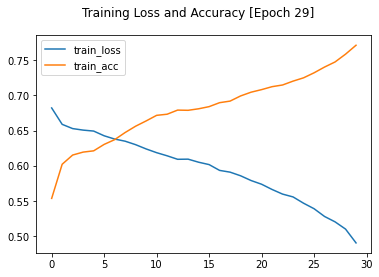

<Figure size 432x288 with 0 Axes>

Epoch 31/100
267/267 [==============================] - 23s 86ms/step - loss: 0.4861 - accuracy: 0.7729
End of epoch 31 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7765191197395325
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
Predicted : 1
Actual : 1.0


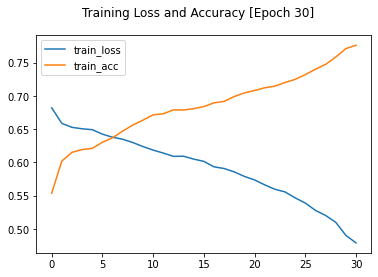

<Figure size 432x288 with 0 Axes>

Epoch 32/100
267/267 [==============================] - 23s 87ms/step - loss: 0.4545 - accuracy: 0.7898
End of epoch 32 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7858784198760986
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
Predicted : 0
Actual : 1.0


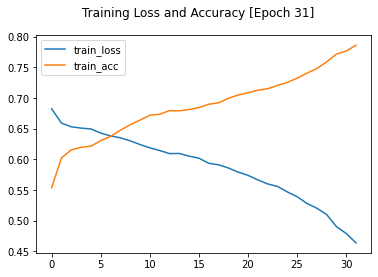

<Figure size 432x288 with 0 Axes>

Epoch 33/100
267/267 [==============================] - 23s 86ms/step - loss: 0.4421 - accuracy: 0.8002
End of epoch 33 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.7956328392028809
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32]
Predicted : 1
Actual : 1.0


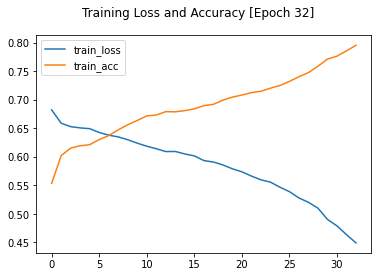

<Figure size 432x288 with 0 Axes>

Epoch 34/100
267/267 [==============================] - 23s 86ms/step - loss: 0.4138 - accuracy: 0.8181
End of epoch 34 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8035944104194641
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33]
Predicted : 1
Actual : 1.0


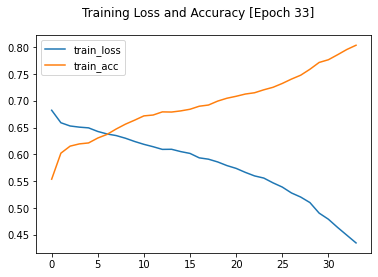

<Figure size 432x288 with 0 Axes>

Epoch 35/100
267/267 [==============================] - 23s 87ms/step - loss: 0.4153 - accuracy: 0.8147
End of epoch 35 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8131293058395386
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]
Predicted : 1
Actual : 1.0


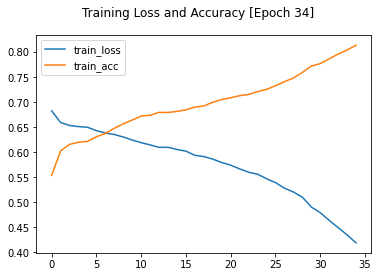

<Figure size 432x288 with 0 Axes>

Epoch 36/100
267/267 [==============================] - 23s 87ms/step - loss: 0.3991 - accuracy: 0.8243
End of epoch 36 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8169198632240295
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
Predicted : 1
Actual : 1.0


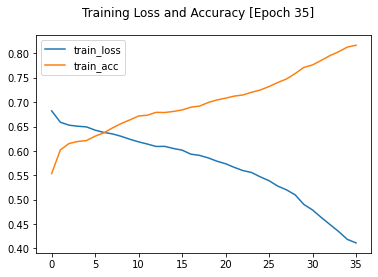

<Figure size 432x288 with 0 Axes>

Epoch 37/100
267/267 [==============================] - 23s 86ms/step - loss: 0.3821 - accuracy: 0.8350
End of epoch 37 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.826454758644104
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36]
Predicted : 1
Actual : 1.0


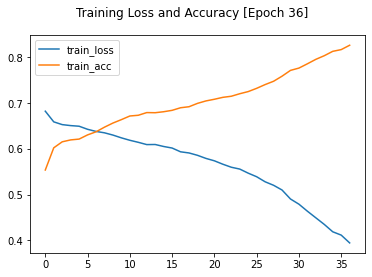

<Figure size 432x288 with 0 Axes>

Epoch 38/100
267/267 [==============================] - 23s 86ms/step - loss: 0.3756 - accuracy: 0.8338
End of epoch 38 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8276329040527344
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37]
Predicted : 1
Actual : 1.0


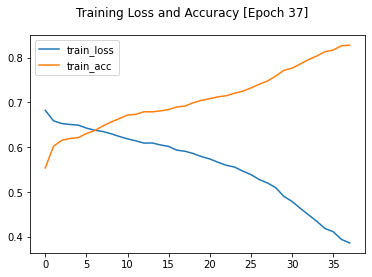

<Figure size 432x288 with 0 Axes>

Epoch 39/100
267/267 [==============================] - 23s 85ms/step - loss: 0.3607 - accuracy: 0.8453
End of epoch 39 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8401679992675781
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38]
Predicted : 1
Actual : 1.0


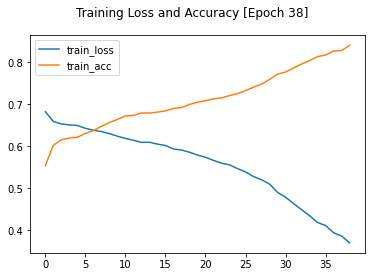

<Figure size 432x288 with 0 Axes>

Epoch 40/100
267/267 [==============================] - 23s 85ms/step - loss: 0.3528 - accuracy: 0.8488
End of epoch 40 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.851693332195282
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Predicted : 1
Actual : 1.0


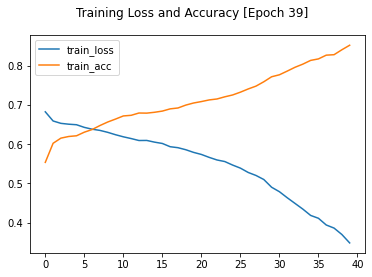

<Figure size 432x288 with 0 Axes>

Epoch 41/100
267/267 [==============================] - 23s 85ms/step - loss: 0.3312 - accuracy: 0.8581
End of epoch 41 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8530470728874207
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40]
Predicted : 1
Actual : 1.0


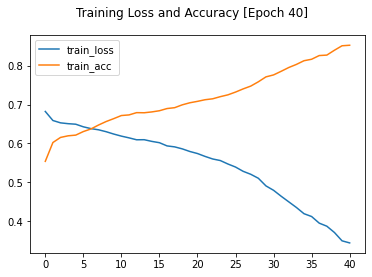

<Figure size 432x288 with 0 Axes>

Epoch 42/100
267/267 [==============================] - 23s 87ms/step - loss: 0.3330 - accuracy: 0.8558
End of epoch 42 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8524397015571594
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]
Predicted : 1
Actual : 1.0


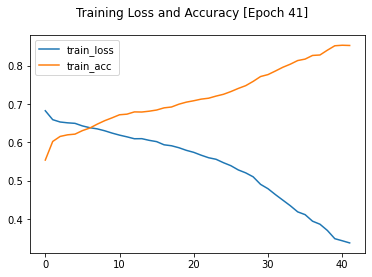

<Figure size 432x288 with 0 Axes>

Epoch 43/100
267/267 [==============================] - 23s 88ms/step - loss: 0.3179 - accuracy: 0.8677
End of epoch 43 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8682751059532166
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
Predicted : 1
Actual : 1.0


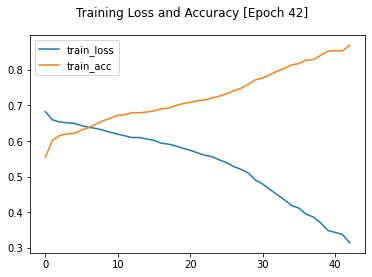

<Figure size 432x288 with 0 Axes>

Epoch 44/100
267/267 [==============================] - 23s 88ms/step - loss: 0.2942 - accuracy: 0.8729
End of epoch 44 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8709460496902466
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43]
Predicted : 1
Actual : 1.0


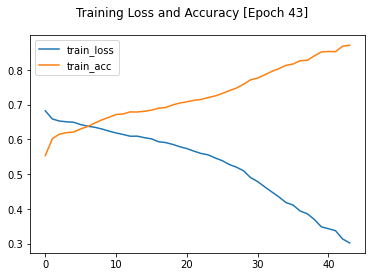

<Figure size 432x288 with 0 Axes>

Epoch 45/100
267/267 [==============================] - 24s 89ms/step - loss: 0.2824 - accuracy: 0.8852
End of epoch 45 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8764927983283997
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44]
Predicted : 1
Actual : 1.0


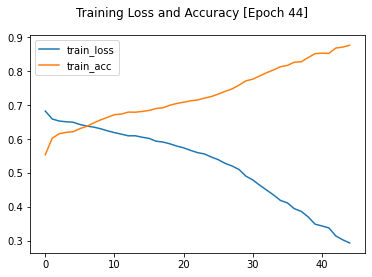

<Figure size 432x288 with 0 Axes>

Epoch 46/100
267/267 [==============================] - 24s 88ms/step - loss: 0.2688 - accuracy: 0.8871
End of epoch 46 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8791930079460144
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]
Predicted : 1
Actual : 1.0


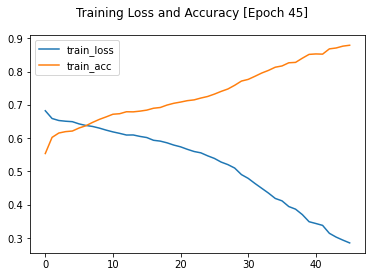

<Figure size 432x288 with 0 Axes>

Epoch 47/100
267/267 [==============================] - 23s 86ms/step - loss: 0.2677 - accuracy: 0.8848
End of epoch 47 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8798955082893372
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Predicted : 1
Actual : 1.0


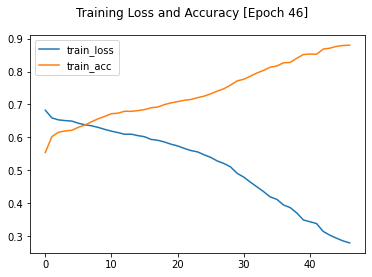

<Figure size 432x288 with 0 Axes>

Epoch 48/100
267/267 [==============================] - 23s 87ms/step - loss: 0.2438 - accuracy: 0.8987
End of epoch 48 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8915451765060425
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
Predicted : 1
Actual : 1.0


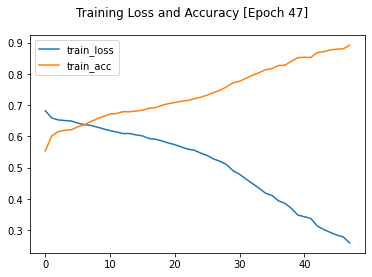

<Figure size 432x288 with 0 Axes>

Epoch 49/100
267/267 [==============================] - 23s 86ms/step - loss: 0.2338 - accuracy: 0.9050
End of epoch 49 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8997848629951477
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
Predicted : 1
Actual : 1.0


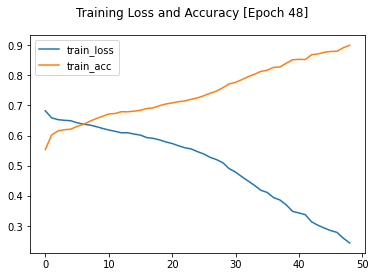

<Figure size 432x288 with 0 Axes>

Epoch 50/100
267/267 [==============================] - 23s 86ms/step - loss: 0.2496 - accuracy: 0.8943
End of epoch 50 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8964846134185791
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
Predicted : 1
Actual : 1.0


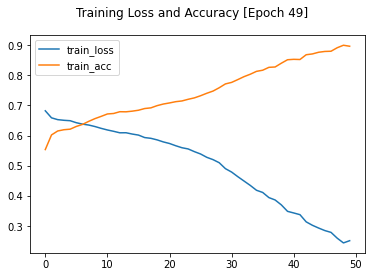

<Figure size 432x288 with 0 Axes>

Epoch 51/100
267/267 [==============================] - 23s 85ms/step - loss: 0.2672 - accuracy: 0.8912
End of epoch 51 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.8871839046478271
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50]
Predicted : 1
Actual : 1.0


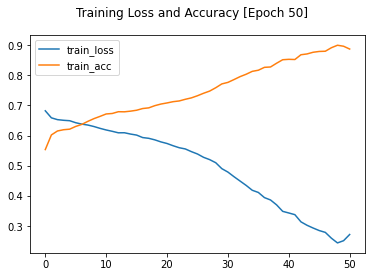

<Figure size 432x288 with 0 Axes>

Epoch 52/100
267/267 [==============================] - 23s 85ms/step - loss: 0.2450 - accuracy: 0.8959
End of epoch 52 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9010947346687317
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51]
Predicted : 1
Actual : 1.0


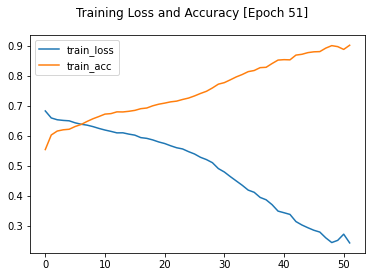

<Figure size 432x288 with 0 Axes>

Epoch 53/100
267/267 [==============================] - 23s 85ms/step - loss: 0.2129 - accuracy: 0.9153
End of epoch 53 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9113174676895142
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52]
Predicted : 1
Actual : 1.0


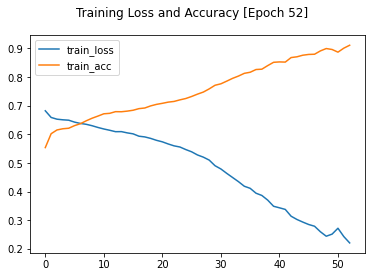

<Figure size 432x288 with 0 Axes>

Epoch 54/100
267/267 [==============================] - 23s 85ms/step - loss: 0.2162 - accuracy: 0.9105
End of epoch 54 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9086684584617615
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53]
Predicted : 1
Actual : 1.0


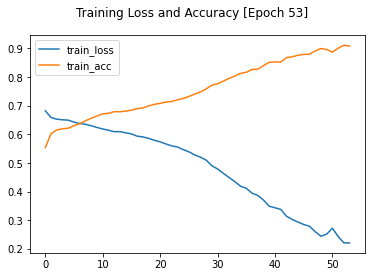

<Figure size 432x288 with 0 Axes>

Epoch 55/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1969 - accuracy: 0.9225
End of epoch 55 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9130810499191284
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
Predicted : 1
Actual : 1.0


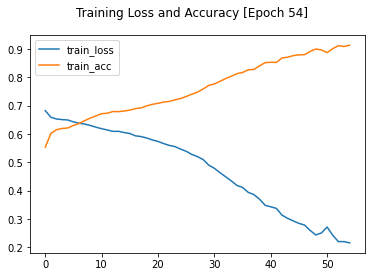

<Figure size 432x288 with 0 Axes>

Epoch 56/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1953 - accuracy: 0.9202
End of epoch 56 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9149836301803589
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
Predicted : 1
Actual : 1.0


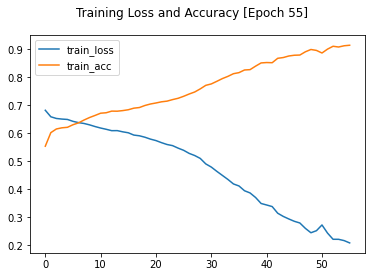

<Figure size 432x288 with 0 Axes>

Epoch 57/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1863 - accuracy: 0.9268
End of epoch 57 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9249575734138489
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56]
Predicted : 1
Actual : 1.0


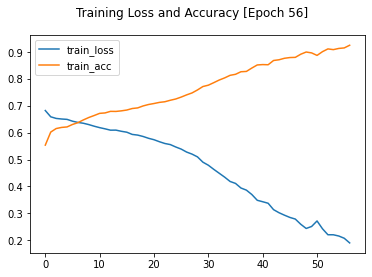

<Figure size 432x288 with 0 Axes>

Epoch 58/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1872 - accuracy: 0.9297
End of epoch 58 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9253234267234802
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57]
Predicted : 1
Actual : 1.0


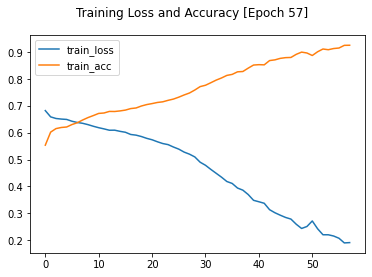

<Figure size 432x288 with 0 Axes>

Epoch 59/100
267/267 [==============================] - 23s 87ms/step - loss: 0.1816 - accuracy: 0.9304
End of epoch 59 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.922564685344696
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58]
Predicted : 1
Actual : 1.0


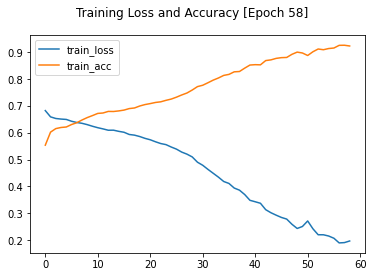

<Figure size 432x288 with 0 Axes>

Epoch 60/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1700 - accuracy: 0.9327
End of epoch 60 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9292017817497253
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
Predicted : 1
Actual : 1.0


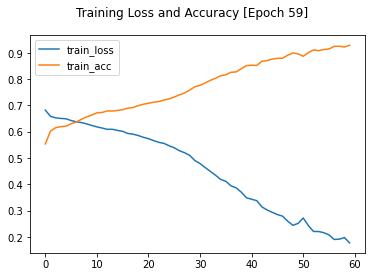

<Figure size 432x288 with 0 Axes>

Epoch 61/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1830 - accuracy: 0.9268
End of epoch 61 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9242624044418335
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60]
Predicted : 1
Actual : 1.0


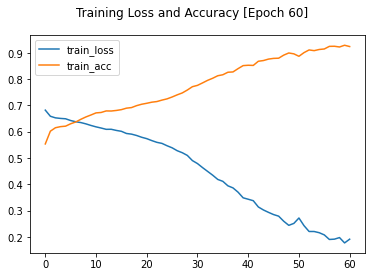

<Figure size 432x288 with 0 Axes>

Epoch 62/100
267/267 [==============================] - 23s 87ms/step - loss: 0.1836 - accuracy: 0.9280
End of epoch 62 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9275187253952026
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61]
Predicted : 1
Actual : 1.0


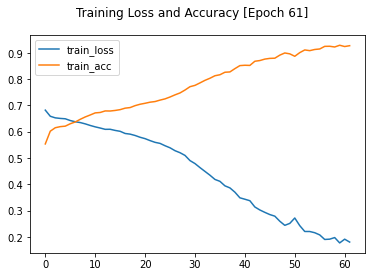

<Figure size 432x288 with 0 Axes>

Epoch 63/100
267/267 [==============================] - 23s 87ms/step - loss: 0.1568 - accuracy: 0.9364
End of epoch 63 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9380049109458923
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62]
Predicted : 1
Actual : 1.0


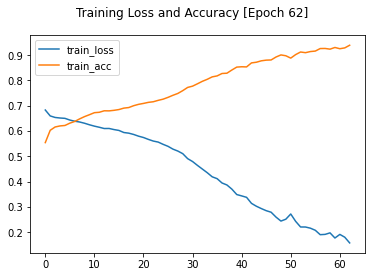

<Figure size 432x288 with 0 Axes>

Epoch 64/100
267/267 [==============================] - 23s 87ms/step - loss: 0.1614 - accuracy: 0.9351
End of epoch 64 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9301750659942627
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
Predicted : 1
Actual : 1.0


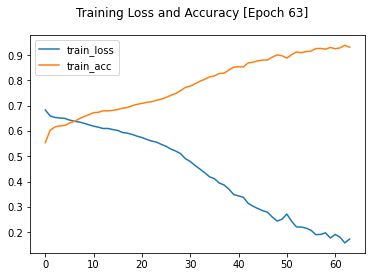

<Figure size 432x288 with 0 Axes>

Epoch 65/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1544 - accuracy: 0.9407
End of epoch 65 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9325898885726929
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64]
Predicted : 1
Actual : 1.0


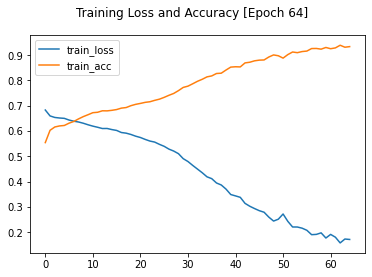

<Figure size 432x288 with 0 Axes>

Epoch 66/100
267/267 [==============================] - 23s 87ms/step - loss: 0.1564 - accuracy: 0.9373
End of epoch 66 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9403392672538757
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]
Predicted : 1
Actual : 1.0


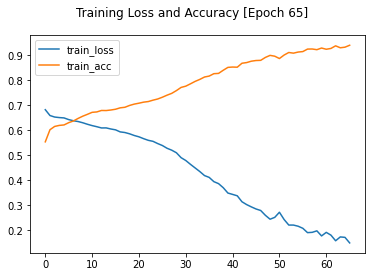

<Figure size 432x288 with 0 Axes>

Epoch 67/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1491 - accuracy: 0.9401
End of epoch 67 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9360291361808777
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66]
Predicted : 1
Actual : 1.0


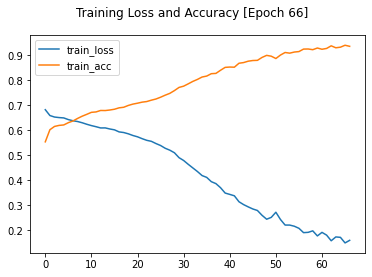

<Figure size 432x288 with 0 Axes>

Epoch 68/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1347 - accuracy: 0.9474
End of epoch 68 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9427174925804138
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]
Predicted : 1
Actual : 1.0


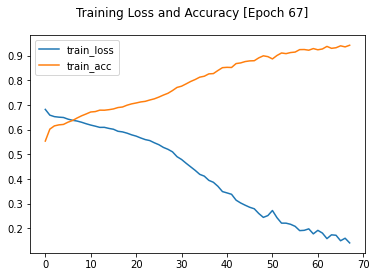

<Figure size 432x288 with 0 Axes>

Epoch 69/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1514 - accuracy: 0.9385
End of epoch 69 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9376755952835083
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68]
Predicted : 1
Actual : 1.0


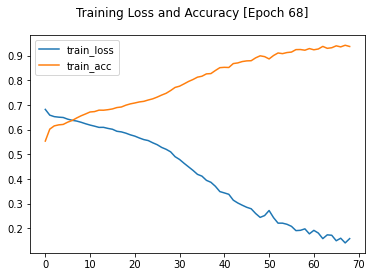

<Figure size 432x288 with 0 Axes>

Epoch 70/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1374 - accuracy: 0.9482
End of epoch 70 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9484252333641052
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69]
Predicted : 1
Actual : 1.0


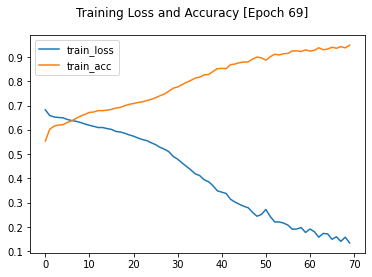

<Figure size 432x288 with 0 Axes>

Epoch 71/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1546 - accuracy: 0.9405
End of epoch 71 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9398928880691528
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
Predicted : 1
Actual : 1.0


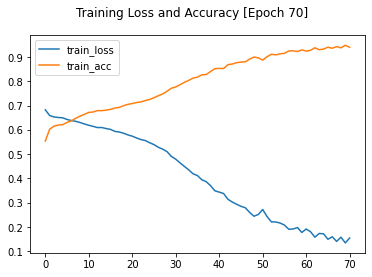

<Figure size 432x288 with 0 Axes>

Epoch 72/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1318 - accuracy: 0.9507
End of epoch 72 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9485057592391968
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71]
Predicted : 1
Actual : 1.0


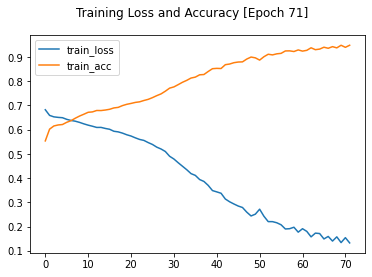

<Figure size 432x288 with 0 Axes>

Epoch 73/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1171 - accuracy: 0.9551
End of epoch 73 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9520255327224731
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
Predicted : 1
Actual : 1.0


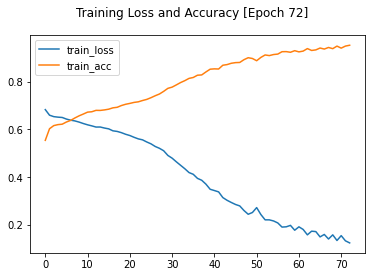

<Figure size 432x288 with 0 Axes>

Epoch 74/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1182 - accuracy: 0.9548
End of epoch 74 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9492960572242737
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73]
Predicted : 1
Actual : 1.0


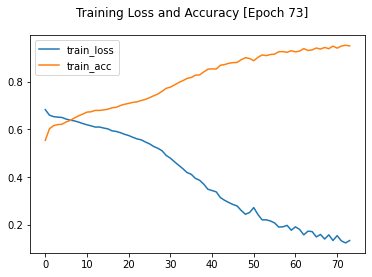

<Figure size 432x288 with 0 Axes>

Epoch 75/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1164 - accuracy: 0.9559
End of epoch 75 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9528231620788574
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74]
Predicted : 1
Actual : 1.0


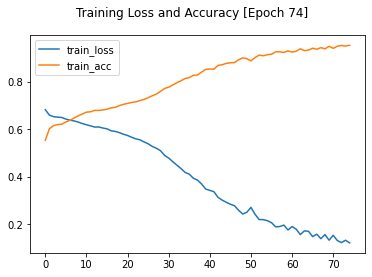

<Figure size 432x288 with 0 Axes>

Epoch 76/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1128 - accuracy: 0.9572
End of epoch 76 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9552745819091797
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75]
Predicted : 1
Actual : 1.0


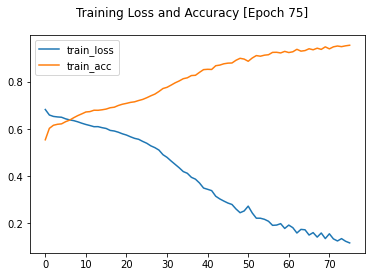

<Figure size 432x288 with 0 Axes>

Epoch 77/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1042 - accuracy: 0.9611
End of epoch 77 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9573893547058105
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76]
Predicted : 1
Actual : 1.0


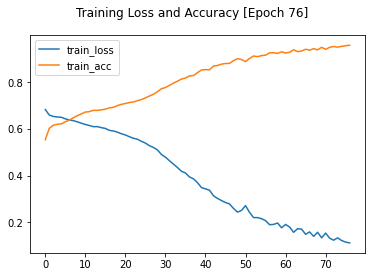

<Figure size 432x288 with 0 Axes>

Epoch 78/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1173 - accuracy: 0.9556
End of epoch 78 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9523255228996277
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
Predicted : 1
Actual : 1.0


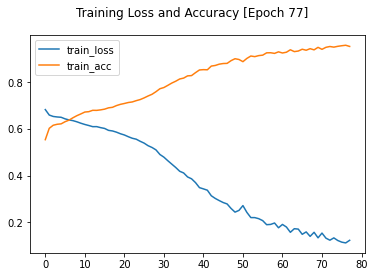

<Figure size 432x288 with 0 Axes>

Epoch 79/100
267/267 [==============================] - 23s 86ms/step - loss: 0.1261 - accuracy: 0.9518
End of epoch 79 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.947269082069397
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78]
Predicted : 1
Actual : 1.0


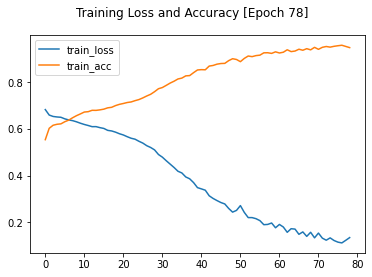

<Figure size 432x288 with 0 Axes>

Epoch 80/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1056 - accuracy: 0.9588
End of epoch 80 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9549233317375183
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]
Predicted : 1
Actual : 1.0


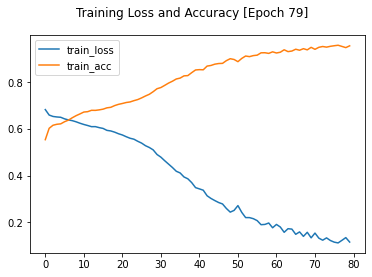

<Figure size 432x288 with 0 Axes>

Epoch 81/100
267/267 [==============================] - 23s 85ms/step - loss: 0.0796 - accuracy: 0.9689
End of epoch 81 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9675901532173157
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80]
Predicted : 1
Actual : 1.0


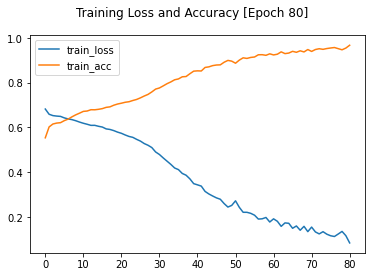

<Figure size 432x288 with 0 Axes>

Epoch 82/100
267/267 [==============================] - 23s 84ms/step - loss: 0.0931 - accuracy: 0.9654
End of epoch 82 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9579015970230103
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81]
Predicted : 1
Actual : 1.0


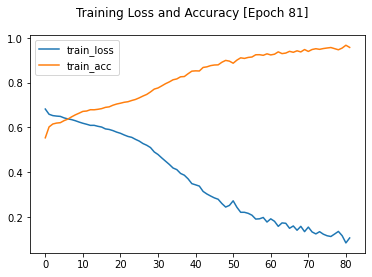

<Figure size 432x288 with 0 Axes>

Epoch 83/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1182 - accuracy: 0.9526
End of epoch 83 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9522303938865662
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82]
Predicted : 1
Actual : 1.0


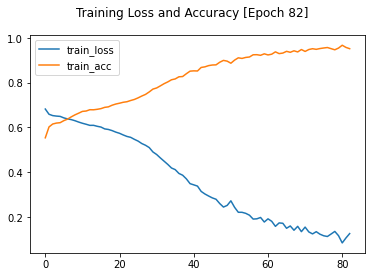

<Figure size 432x288 with 0 Axes>

Epoch 84/100
267/267 [==============================] - 23s 85ms/step - loss: 0.1102 - accuracy: 0.9579
End of epoch 84 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9601627588272095
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83]
Predicted : 1
Actual : 1.0


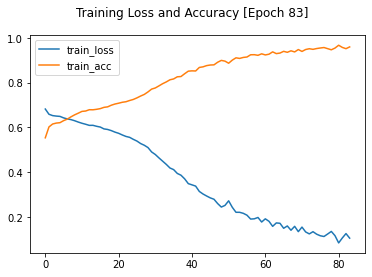

<Figure size 432x288 with 0 Axes>

Epoch 85/100
267/267 [==============================] - 23s 86ms/step - loss: 0.0942 - accuracy: 0.9642
End of epoch 85 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9650290012359619
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84]
Predicted : 1
Actual : 1.0


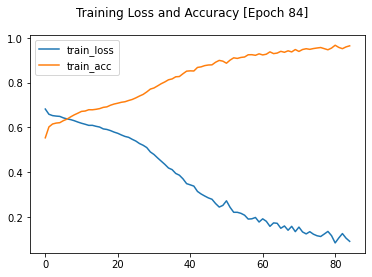

<Figure size 432x288 with 0 Axes>

Epoch 86/100
267/267 [==============================] - 23s 87ms/step - loss: 0.0795 - accuracy: 0.9694
End of epoch 86 , got keys ['loss', 'accuracy', 'lr'] and accuracy is 0.9656070470809937
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85]
Predicted : 1
Actual : 1.0


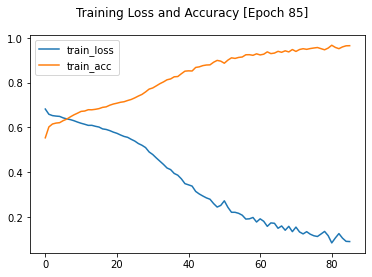

<Figure size 432x288 with 0 Axes>

In [113]:
# No callbacks
history = history1 = model.fit(X_train,batch_size=bs,
                   epochs = epochs,
                callbacks = [reduce_lr,plot_losses,early_stop])

In [114]:
!mkdir 'weights'

In [115]:
!ls

__notebook_source__.ipynb  weights


In [116]:
model.save_weights('./weights/model__eeg2.h5')

In [117]:
model.load_weights('./weights/model__eeg2.h5')

# Plots and evaluation 

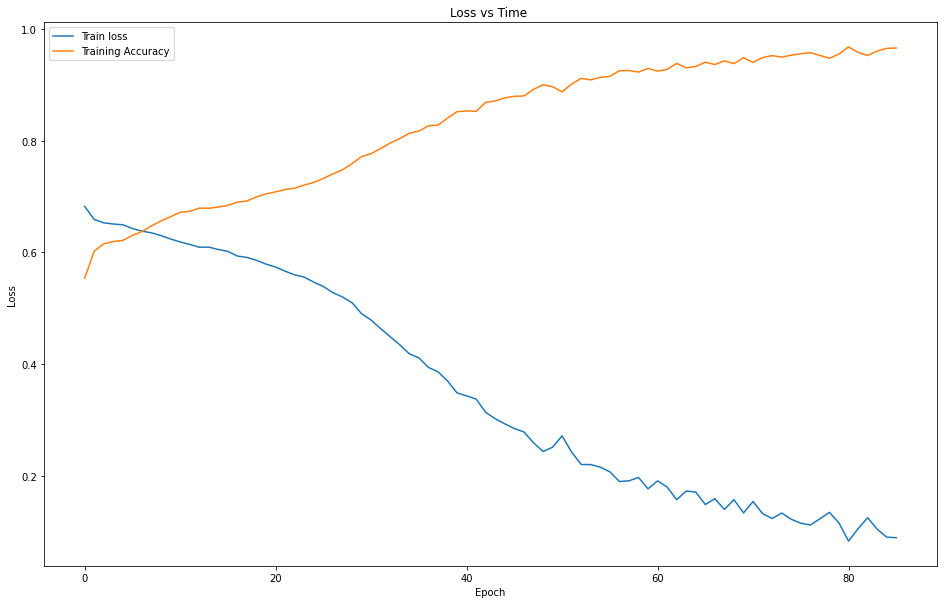

In [118]:
plt.figure(figsize = (16,10))
plt.plot(range(len(history1.history['loss'])),history1.history['loss'],label = 'Train loss')
plt.plot(range(len(history1.history['accuracy'])),history1.history['accuracy'],label = 'Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title("Loss vs Time ")
plt.legend()
plt.show()


In [119]:
train_X= np.reshape(train_X,(train_X.shape[0], train_X.shape[1],1))

print(train_X.shape)

test_X= np.reshape(test_X,(test_X.shape[0], test_X.shape[1],1))

print(test_X.shape)
print(test_y.shape)

(8541, 16, 1)
(2847, 16, 1)
(2847,)


In [120]:
best_acc,epoch_at = max(history1.history['accuracy']),history1.history['accuracy'].index(max(history1.history['accuracy']))
best_acc *= 100
print("Best Accuracy : {:.2f} % at epoch : {}".format(best_acc,epoch_at))

Best Accuracy : 96.76 % at epoch : 80


In [121]:
model.evaluate(test_X,test_y)

89/89 [==============================] - 4s 30ms/step - loss: 0.7404 - accuracy: 0.8647


[0.7403830885887146, 0.8647480010986328]

In [122]:
y_true = np.array(test_y)
y_pred = np.squeeze(model.predict(test_X))
y_pred

array([[9.9977511e-01, 9.9978733e-01, 9.9978709e-01, ..., 9.9999952e-01,
        9.9999958e-01, 9.9961722e-01],
       [1.1214018e-03, 1.7504990e-03, 7.0267916e-04, ..., 1.6596019e-03,
        1.2251735e-03, 9.7944867e-05],
       [9.7434521e-03, 4.0836930e-03, 8.6749494e-03, ..., 1.1158913e-02,
        3.9820075e-03, 5.8189929e-03],
       ...,
       [9.3713450e-01, 9.4106960e-01, 9.3877137e-01, ..., 9.5102406e-01,
        9.2913908e-01, 9.4582009e-01],
       [5.7711697e-01, 4.4035250e-01, 5.6007880e-01, ..., 6.0436237e-01,
        2.4189192e-01, 5.2345043e-01],
       [9.9996662e-01, 9.9996734e-01, 9.9998230e-01, ..., 1.0000000e+00,
        9.9999976e-01, 9.9999940e-01]], dtype=float32)

In [123]:
y_pred = np.array(y_pred >= 0.5, dtype = np.int)

In [124]:
y_pred

array([[1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [125]:
np.expand_dims(test_X[0],axis = 0)
model.predict(np.expand_dims(test_X[0],axis = 0))

array([[[0.9997752 ],
        [0.99978733],
        [0.9997871 ],
        [0.99988353],
        [0.99991024],
        [0.99990237],
        [0.9999224 ],
        [0.9999155 ],
        [0.99984705],
        [0.99991715],
        [0.9997744 ],
        [0.9998982 ],
        [0.9999909 ],
        [0.9999996 ],
        [0.99999964],
        [0.9996172 ]]], dtype=float32)